In [3]:
import pandas as pd

In [4]:
fruits = pd.DataFrame({'数值特征':[5,6,7,8,9],'类型特征':['西瓜','香蕉','橘子','苹果','葡萄']})

In [5]:
display(fruits)

,数值特征,类型特征
0,5,西瓜
1,6,香蕉
2,7,橘子
3,8,苹果
4,9,葡萄


In [6]:
fruits_dum = pd.get_dummies(fruits)

In [7]:
display(fruits_dum)

,数值特征,类型特征_橘子,类型特征_苹果,类型特征_葡萄,类型特征_西瓜,类型特征_香蕉
0,5,0,0,0,1,0
1,6,0,0,0,0,1
2,7,1,0,0,0,0
3,8,0,1,0,0,0
4,9,0,0,1,0,0


In [8]:
fruits['数值特征'] = fruits['数值特征'].astype(str)
pd.get_dummies(fruits,columns=['数值特征'])

,类型特征,数值特征_5,数值特征_6,数值特征_7,数值特征_8,数值特征_9
0,西瓜,1,0,0,0,0
1,香蕉,0,1,0,0,0
2,橘子,0,0,1,0,0
3,苹果,0,0,0,1,0
4,葡萄,0,0,0,0,1


In [9]:
### 数据装箱

In [10]:
import numpy as np
import matplotlib.pyplot as plt

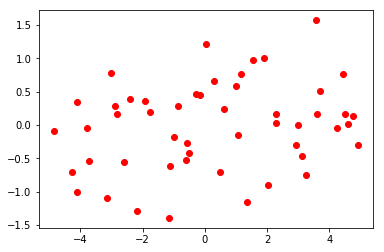

In [11]:
rnd = np.random.RandomState(38)
x = rnd.uniform(-5,5,size=50)
y_no_noise = (np.cos(6*x+x))
X = x.reshape(-1,1)
y = (y_no_noise+rnd.normal(size=len(x)))/2
plt.plot(X,y,'o',c='r')
plt.show()

In [12]:
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor

In [13]:
line = np.linspace(-5,5,1000,endpoint=False).reshape(-1,1)

In [14]:
mlpr = MLPRegressor().fit(X,y)
knr = KNeighborsRegressor().fit(X,y)

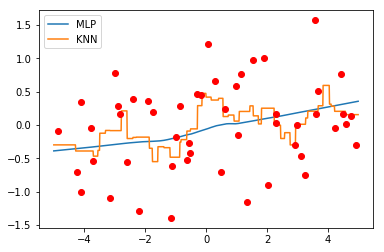

In [15]:
plt.plot(line,mlpr.predict(line),label='MLP')
plt.plot(line,knr.predict(line),label='KNN')
plt.plot(X,y,'o',c='r')
plt.legend(loc='best')
plt.show()

In [16]:
### 装箱处理

In [20]:
bins = np.linspace(-5,5,11)
target_bin = np.digitize(X,bins=bins)
X[:10],target_bin[:10]

(array([[-1.1522688 ],
        [ 3.59707847],
        [ 4.44199636],
        [ 2.02824894],
        [ 1.33634097],
        [ 1.05961282],
        [-2.99873157],
        [-1.12612112],
        [-2.41016836],
        [-4.25392719]]), array([[ 4],
        [ 9],
        [10],
        [ 8],
        [ 7],
        [ 7],
        [ 3],
        [ 4],
        [ 3],
        [ 1]]))

In [21]:
### 热图处理

In [22]:
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(sparse=False)
onehot.fit(target_bin)
X_in_bin = onehot.transform(target_bin)
X_in_bin.shape,X_in_bin[:10]

((50, 10), array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]]))

In [23]:
### 独热编码数据表达

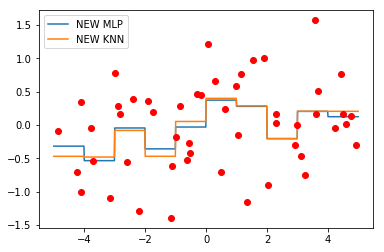

In [27]:
new_line = onehot.transform(np.digitize(line,bins=bins))
new_mlpr = MLPRegressor().fit(X_in_bin,y)
new_knr = KNeighborsRegressor().fit(X_in_bin,y)
plt.plot(line,new_mlpr.predict(new_line),label='NEW MLP')
plt.plot(line,new_knr.predict(new_line),label='NEW KNN')
plt.plot(X,y,'o',c='r')
plt.legend(loc='best')
plt.show()

### 大规模高纬度的数据集使用线性模型的时候，可以提高线性模型的准确率，对决策树一类的算法没用

In [28]:
### 增加一个特征，数据升维
X_stack = np.hstack([X,X_in_bin])
X_stack.shape

(50, 11)

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


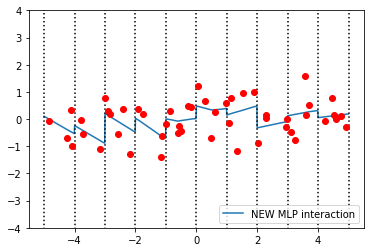

In [29]:
line_stack = np.hstack([line,new_line])
mlpr_interact = MLPRegressor().fit(X_stack,y)
plt.plot(line,mlpr_interact.predict(line_stack),label='NEW MLP interaction')
plt.ylim(-4,4)
for vline in bins:
    plt.plot([vline,vline],[-5,5],':',c='k') 
plt.plot(X,y,'o',c='r')
plt.legend(loc='lower right')
plt.show()

/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


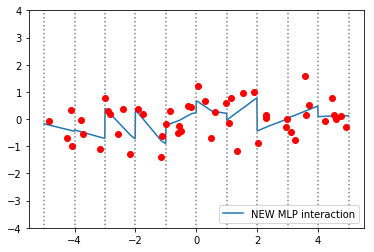

In [32]:
### 数据堆叠
x_multi = np.hstack([X_in_bin,X*X_in_bin])
### 重新训练模型
line_multi = np.hstack([new_line,line*new_line])
mlpr_multi = MLPRegressor().fit(x_multi,y)
### 画图
plt.plot(line,mlpr_multi.predict(line_multi),label='NEW MLP interaction')
plt.ylim(-4,4)
for vline in bins:
    plt.plot([vline,vline],[-5,5],':',c='gray') 
plt.plot(X,y,'o',c='r')
plt.legend(loc='lower right')
plt.show()

In [ ]:
### 达到纠正欠拟合的目的